<a href="https://colab.research.google.com/github/HalyshAnton/Python-AI/blob/AI_2_lesson/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Продаж велосипедів

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>


## Імпорт модулів

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Завантаження даних

In [ ]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

sales.drop(columns=["Year"], inplace=True)


## Знайомство з даними

In [ ]:
sales.head()

In [31]:
# назви стовпчиків до нижнього регістру
sales.columns = sales.columns.str.lower()

In [ ]:
sales.shape

In [ ]:
sales.info()

## Аналіз числових ознак

### Основні статистичні характеристики

Середнє арифметичне(математичне сподівання) `mean`. Можна вважати типовим представником

In [ ]:
sales['unit_cost'].mean()

Якщо дані мають аномально великі чи малі значення(викиди) то кращим типовим представником буде медіана `median`. Це число яке є більшим рівно за половину даних.

**Стійкість характеристики до викидів називають робастністю (robust)**

In [ ]:
median_cost = sales['unit_cost'].median()
median_cost

In [ ]:
# частка даних менших за медіану
(sales['unit_cost'] < median_cost).mean()

Також важливими є квантилі `quantile`: числа які більші рівно за певну частку даних. Найчастіше беруть перший(>25%) та третій(>75%)

In [ ]:
q_3 = sales['unit_cost'].quantile(q=0.75)
q_3

In [ ]:
# частка даних менших за медіану
(sales['unit_cost'] < q_3).mean()

Окрім типового представника, важливим є те наскільки дані "сконцентровані" навколо нього. Для цього є дві характеристики: дисперсія `var` та стандартне відхилення `std`

<div>
<img src="https://homework.study.com/cimages/multimages/16/stdev1539666547228777994.png"
width="700"/>
</div>

In [ ]:
sales['unit_cost'].var()

In [ ]:
sales['unit_cost'].std()

In [ ]:
print(f"корінь квадратний з дисперсії: {np.sqrt(sales['unit_cost'].var())}")
print(f"стандартне відхилення:         {sales['unit_cost'].std()}")

Усі ці характеристики можна отримати за допомогою методу `describe`

In [ ]:
sales['unit_cost'].describe()

In [ ]:
sales.describe()

### Основні графіки

Гістограма показує кількість точок що належить конкретному проміжку. Має вигляд стовпчиків.

In [30]:
ax = sales['unit_cost'].plot(kind='hist',    # тип діаграми hist
                             bins=30,        # кількість стовпчиків
                             figsize=(14,6)  # розмір зображення(в дюймах)
                             )


ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

KeyError: 'unit_cost'

In [ ]:
ax = sales['customer_age'].plot(kind='hist',    # тип діаграми hist
                                bins=31,        # кількість стовпчиків
                                figsize=(14,6)  # розмір зображення(в дюймах)
                               )


ax.set_ylabel('Number of Customers')
ax.set_xlabel('Age')

Вищенаведена гістограма є прикладом _поганих_ даних. Більшість алгоритмів ШІ вимагають щоб дані були _нормально розподілені_.

**Центральна гранична теорема:**
Сума деякої кількості незалежних і однаково розподілених випадкових величин із скінченною дисперсією буде прямувати до нормального розподілу із збільшенням кількості цих величин.

Через те, що на більшість числових величин впливає велика кількість _незалежних факторів_, умови теореми доволі часто виконуються.

В даному прикладі ми використовуємо згенеровані дані за допомогою `numpy`

In [ ]:
norm_data = np.random.normal(loc=0,      # середнє арифметичне
                             scale=30,   # стандартне відхилення
                             size=(50000,))

plt.hist(norm_data, bins=30)
plt.show()

Ящик з вусами `boxplot` показує взаємне розташування усіх квантилів(включно з медіаною), та дозволяє визначити викиди

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201127012952/boxplot.png">

<Axes: >

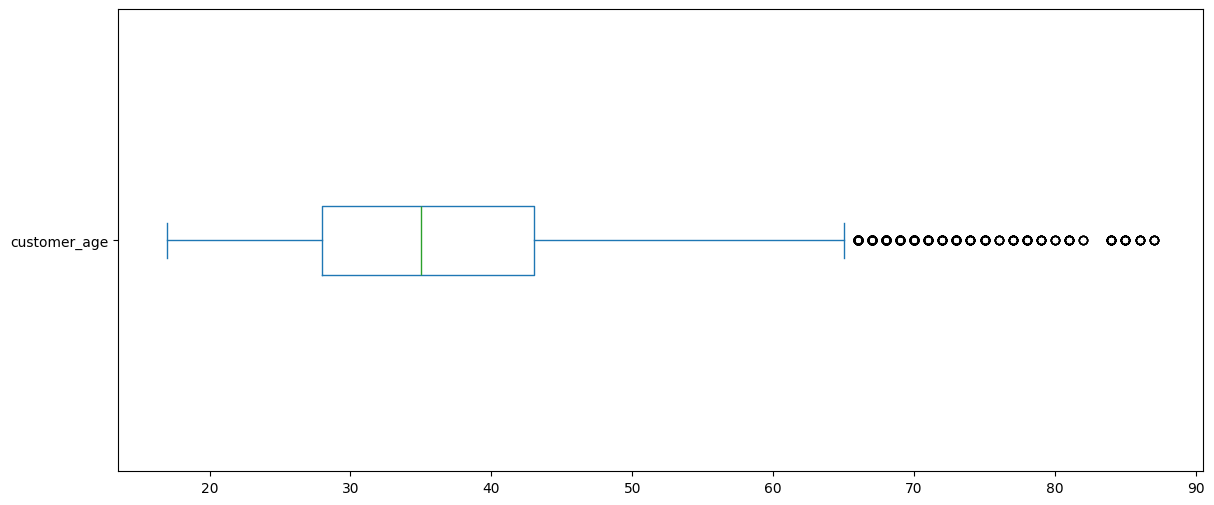

In [32]:
sales['customer_age'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

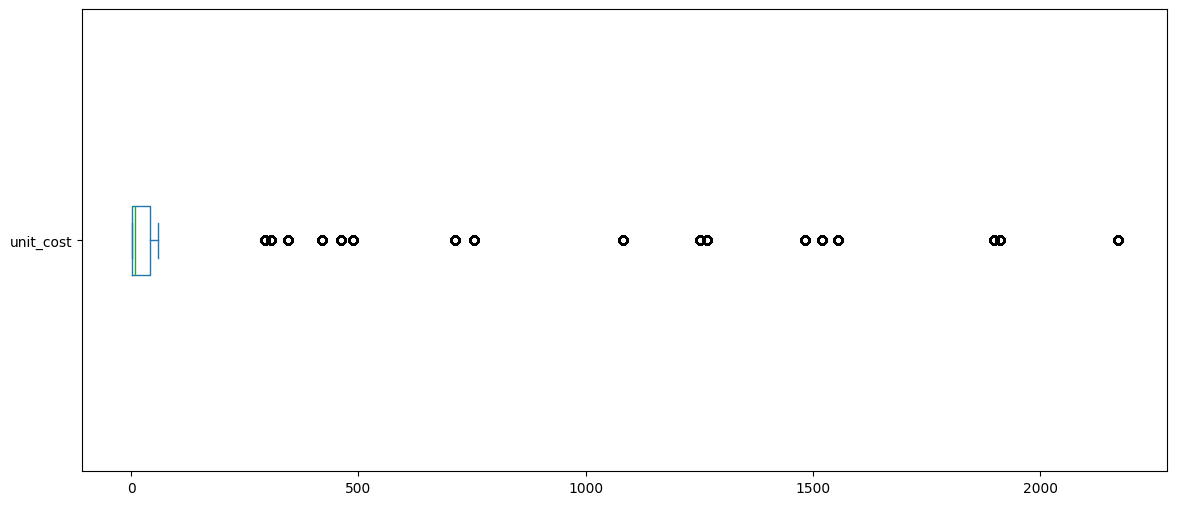

In [33]:
sales['unit_cost'].plot(kind='box', vert=False, figsize=(14,6))

### Очищення від викидів

Існує бізліч алгоритмів для виявлення викидів(деякі з них вимагають умову нормальності даних), проте найбільш універсальним є квантильний аналіз:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Очислюємо значення `IQR = q3 - q1`
3. Обчислюємо `lower = q1 - 1.5*IQR`
4. Обчислюємо `upper = q3 + 1.5*IQR`
5. Викидами вважаємо значення які `< lower` або `>upper`

Після очищення даних потрібно **обов'язково** перевірити їхню кількість

#### Варіант 1
Знаходими викиди для першого стовпчика, очищуємо і переходимо до наступного

In [6]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]


In [7]:
sales1 = sales.copy()

for column_name in sales1.columns:
  if sales1.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  sales1 = remove_outliers(sales1, column_name)

sales1.shape


(67414, 17)

#### Варіант 2
Змінюємо коефіцієнт при `iqr` на 3

In [34]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 3*iqr # замінити 1,5 на 3
  upper = q3 + 3*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

In [35]:
sales2 = sales.copy()

for column_name in sales2.columns:
  if sales2.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  sales2 = remove_outliers(sales1, column_name)


sales2.shape

KeyError: 'day'

#### Варіант 3
Спочатку знаходими викиди для всіх стовпчиків і лише потім очищуємо дані

In [8]:
sales3 = sales.copy()

In [12]:
sales_num = sales.select_dtypes(include='number')   # вибираємо стовпчики з числовими ознаками

sales_num

,Day,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,19,8,45,120,590,360,950
1,26,19,8,45,120,590,360,950
2,23,49,23,45,120,1366,1035,2401
3,23,49,20,45,120,1188,900,2088
4,15,47,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...
113031,12,41,3,24,64,112,72,184
113032,2,18,22,24,64,655,528,1183
113033,2,18,22,24,64,655,528,1183
113034,4,37,24,24,64,684,576,1260


In [36]:
q1 = sales_num.quantile(q=0.25)
q3 = sales_num.quantile(q=0.75)

iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

mask = (sales_num > lower) & (sales_num < upper)

mask = mask.all(axis=1)

# all -- все True
# any -- хоча б один True

# (row, col) -> (row)



In [26]:
sales.head(5)

,Date,Day,Month,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [27]:
   # включаємо лише ті рядки, де немає викиду по жодному стовпчику

cleaned_sales = sales3[mask]

In [28]:
cleaned_sales.shape

(85008, 17)

### Ящик з вусами після очищення

In [37]:
sales = cleaned_sales

In [40]:
sales.columns = sales.columns.str.lower()

<Axes: >

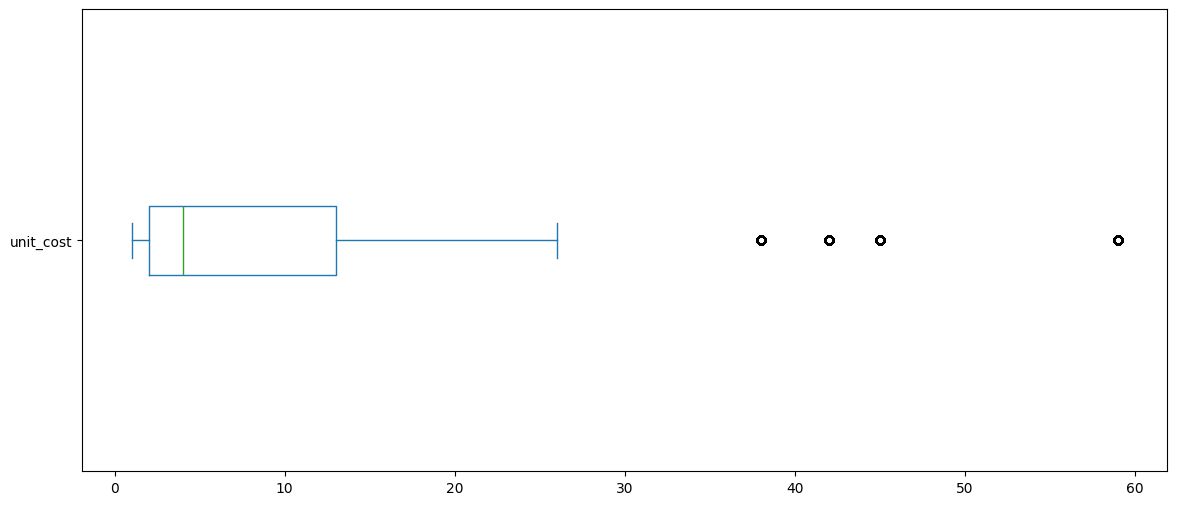

In [41]:
sales['unit_cost'].plot(kind='box', vert=False, figsize=(14,6))

## Аналіз категоріальних ознак

In [42]:
sales.head()

,date,day,month,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
4,2014-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379


In [45]:
len(sales)

85008

In [46]:
sales['age_group'].value_counts() / len(sales) * 100

,count
age_group,
Adults (35-64),49.696499
Young Adults (25-34),33.355684
Youth (<25),16.743130
Seniors (64+),0.204687


<Axes: ylabel='count'>

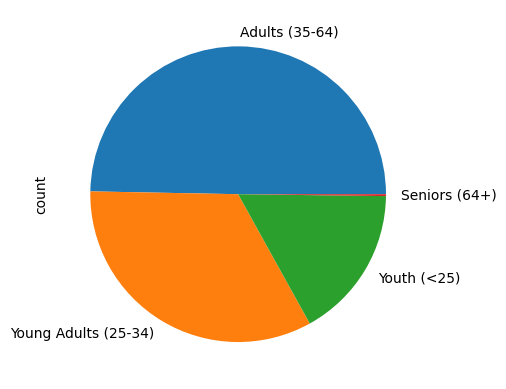

In [47]:
sales['age_group'].value_counts().plot(kind='pie')

<Axes: xlabel='age_group'>

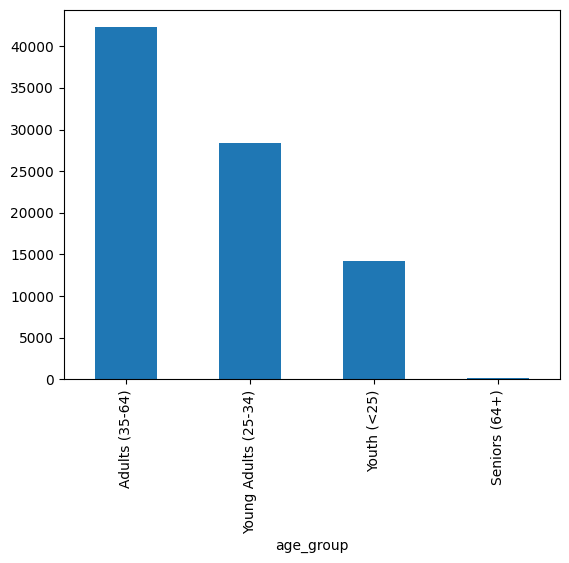

In [49]:
sales['age_group'].value_counts().plot(kind='bar')

In [ ]:
sales['age_group'].value_counts().plot(kind='pie', figsize=(6,6))

In [ ]:
ax = sales['age_group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

In [51]:
sales.describe(include='object')

,month,age_group,customer_gender,country,state,product_category,sub_category,product
count,85008,85008,85008,85008,85008,85008,85008,85008
unique,12,4,2,6,52,2,14,42
top,December,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,8204,42246,44147,30376,17019,69481,33608,10764




## Залежність між різними ознаками

### Кореляція
Коефіцієнт кореляції Пірсона вимірює лінійну залежність між двома наборами даних. Вимірюється в межех [-1, 1], де 1 - позитивна залежність, -1 - негативна, 0 - відсутність кореляції.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png">

In [56]:
corr = sales.select_dtypes(include='number').corr(method='pearson')

corr

,day,customer_age,order_quantity,unit_cost,unit_price,profit,cost,revenue
day,1.000000,-0.013578,-0.002707,-0.000381,0.004483,0.005212,-0.001651,0.001884
customer_age,-0.013578,1.000000,0.013339,0.022410,0.031919,0.045613,0.033750,0.043963
order_quantity,-0.002707,0.013339,1.000000,-0.115763,-0.119827,0.400423,0.335141,0.408088
unit_cost,-0.000381,0.022410,-0.115763,1.000000,0.903372,0.390650,0.740797,0.634014
unit_price,0.004483,0.031919,-0.119827,0.903372,1.000000,0.586022,0.630243,0.676903
profit,0.005212,0.045613,0.400423,0.390650,0.586022,1.000000,0.616964,0.893740
cost,-0.001651,0.033750,0.335141,0.740797,0.630243,0.616964,1.000000,0.904438
revenue,0.001884,0.043963,0.408088,0.634014,0.676903,0.893740,0.904438,1.000000


**Візуалізація**

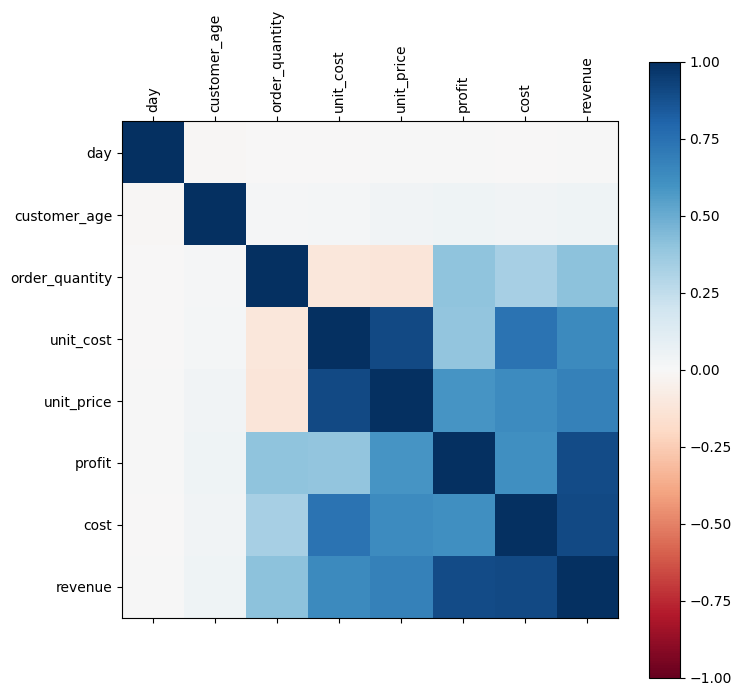

In [57]:
fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, cmap='RdBu', fignum=False)

# підписи для рядків та стовпчиків матриці
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

# кольорова панель
plt.colorbar()
plt.clim(-1, 1)

<Axes: xlabel='unit_cost', ylabel='unit_price'>

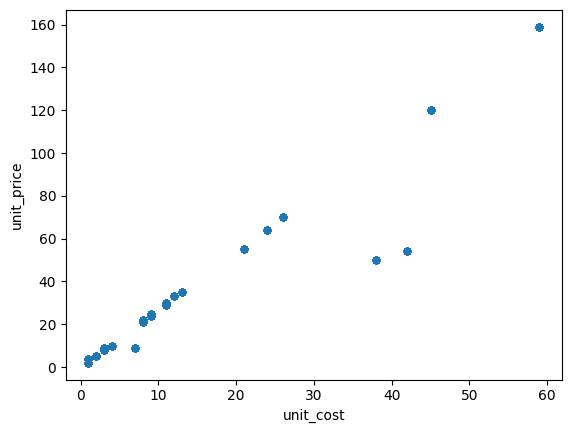

In [58]:
sales.plot(kind='scatter', x='unit_cost', y='unit_price')

Для виявлення будь-якої зростаючої або спадаючої залежності є коефіцієнт кореляції Спірмена

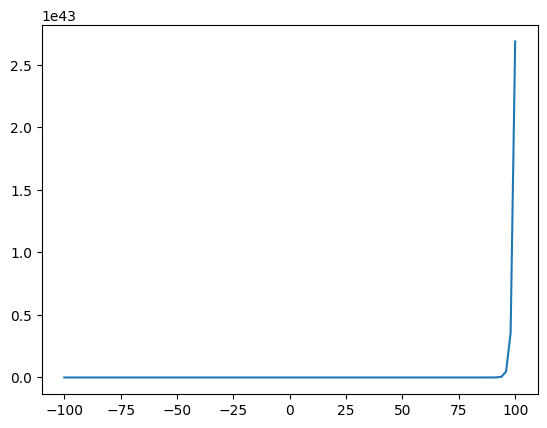

In [60]:
plt.plot(x, y)

In [59]:
x = np.linspace(-100, 100, 100)
y = np.exp(x)

df = pd.DataFrame({'x': x,
                   'y': y})

print(f"pearson:  {df.corr(method='pearson').loc['x', 'y']}")
print()
print(f"spearman: {df.corr(method='spearman').loc['x', 'y']}")

pearson:  0.19663886711391942

spearman: 1.0


In [62]:
corr

,day,customer_age,order_quantity,unit_cost,unit_price,profit,cost,revenue
day,1.000000,-0.014875,-0.002773,0.006486,0.005740,0.004324,0.003223,0.002812
customer_age,-0.014875,1.000000,0.015924,0.040011,0.040374,0.045213,0.041434,0.044351
order_quantity,-0.002773,0.015924,1.000000,-0.063815,-0.064118,0.491273,0.500254,0.510408
unit_cost,0.006486,0.040011,-0.063815,1.000000,0.995056,0.645659,0.794373,0.777797
unit_price,0.005740,0.040374,-0.064118,0.995056,1.000000,0.674039,0.786351,0.782750
profit,0.004324,0.045213,0.491273,0.645659,0.674039,1.000000,0.835077,0.912391
cost,0.003223,0.041434,0.500254,0.794373,0.786351,0.835077,1.000000,0.981847
revenue,0.002812,0.044351,0.510408,0.777797,0.782750,0.912391,0.981847,1.000000


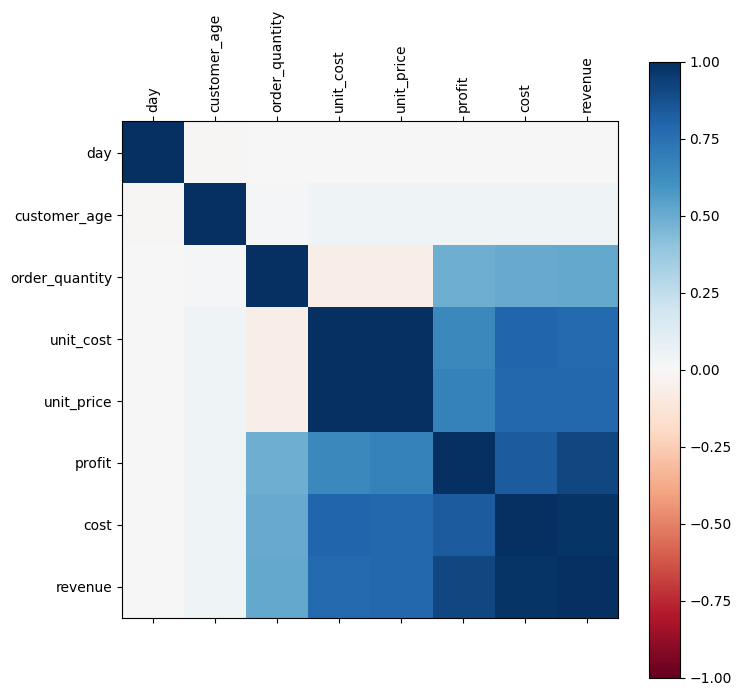

In [61]:
corr = sales.select_dtypes(include='number').corr(method='spearman')

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=False)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.clim(-1, 1)

### Точкові діаграми
Зображення двох характеристик як координат точок

In [52]:
sales.head()

,date,day,month,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
4,2014-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379


<Axes: xlabel='customer_age', ylabel='profit'>

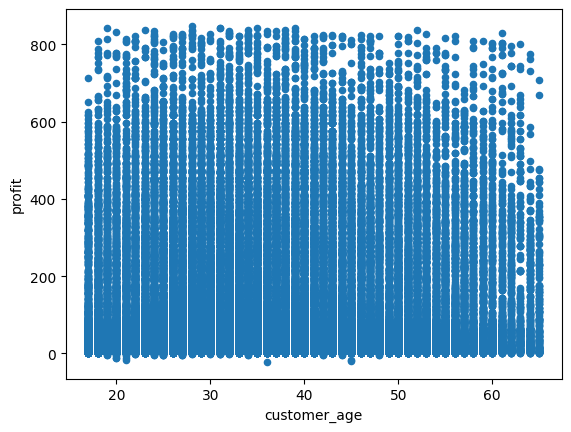

In [53]:
sales.plot(kind='scatter', x='customer_age', y='profit')

<Axes: xlabel='revenue', ylabel='profit'>

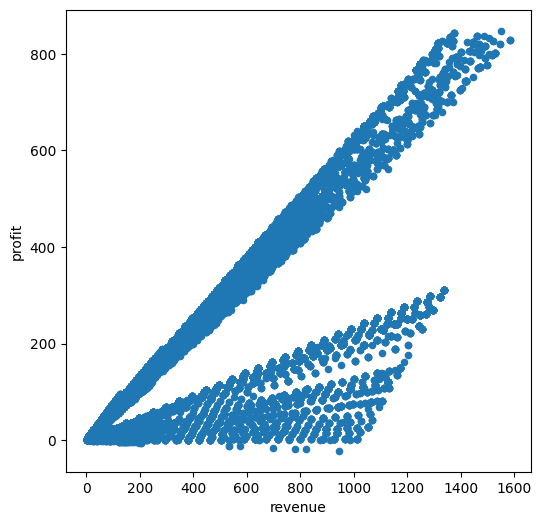

In [54]:
sales.plot(kind='scatter', x='revenue', y='profit', figsize=(6,6))

### Групові ящики з вусами
Зображають декілька ящиків з вусами одної(числової) характеристики, згрупованих за значенням іншої(категоріальної) характеристики

In [65]:
sales

,date,day,month,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
4,2014-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


(array([1, 2, 3, 4]),
 [Text(1, 0, 'Adults (35-64)'),
  Text(2, 0, 'Seniors (64+)'),
  Text(3, 0, 'Young Adults (25-34)'),
  Text(4, 0, 'Youth (<25)')])

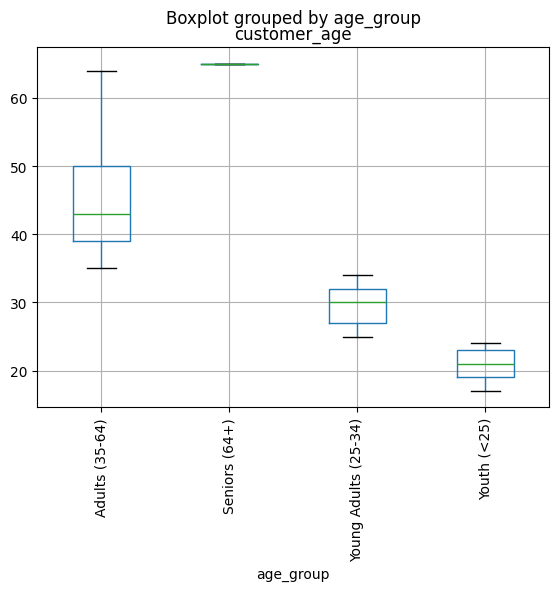

In [74]:
sales.boxplot(column='customer_age', by='age_group')
plt.xticks(rotation=90)


In [79]:
sales['country'].value_counts()

,count
country,
United States,30376
Australia,16641
Canada,12261
United Kingdom,9851
France,8033
Germany,7846


In [81]:
sales.columns

Index(['date', 'day', 'month', 'customer_age', 'age_group', 'customer_gender',
       'country', 'state', 'product_category', 'sub_category', 'product',
       'order_quantity', 'unit_cost', 'unit_price', 'profit', 'cost',
       'revenue'],
      dtype='object')

In [84]:
sales.groupby(by='sub_category')['profit'].median()

,profit
sub_category,
Bike Racks,349.0
Bike Stands,390.0
Bottles and Cages,45.0
Caps,13.0
Cleaners,63.0
Fenders,183.0
Gloves,178.0
Helmets,268.0
Hydration Packs,395.0


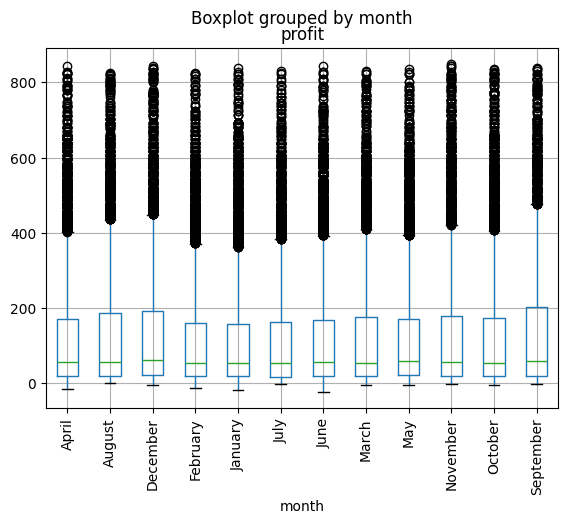

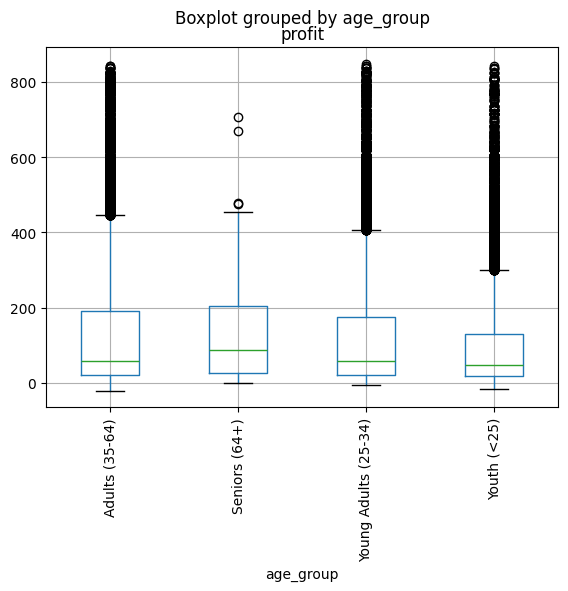

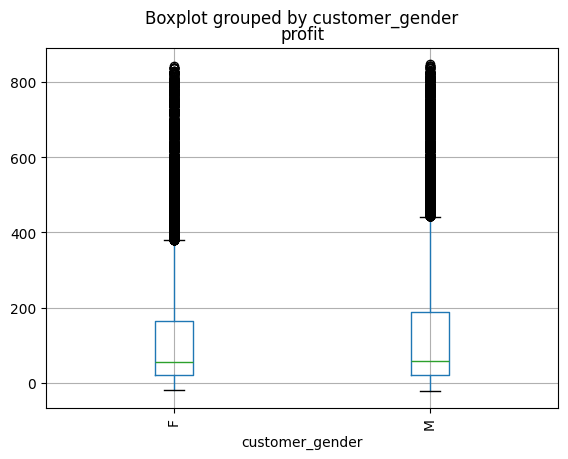

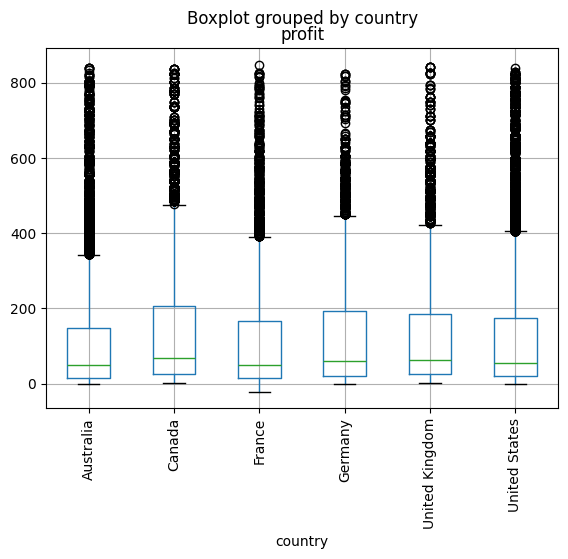

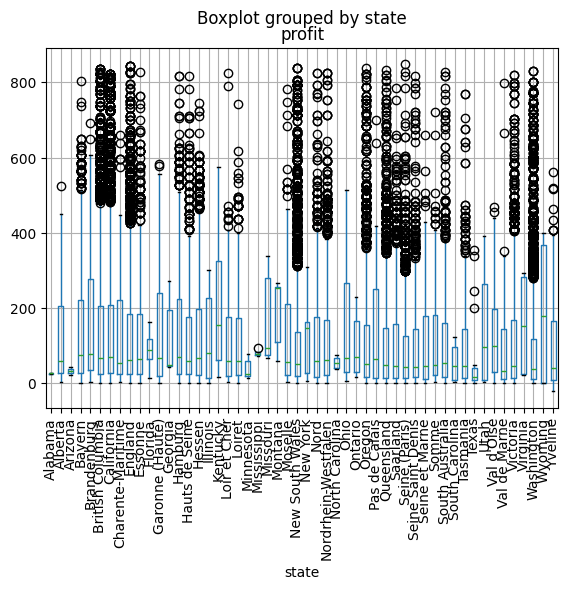

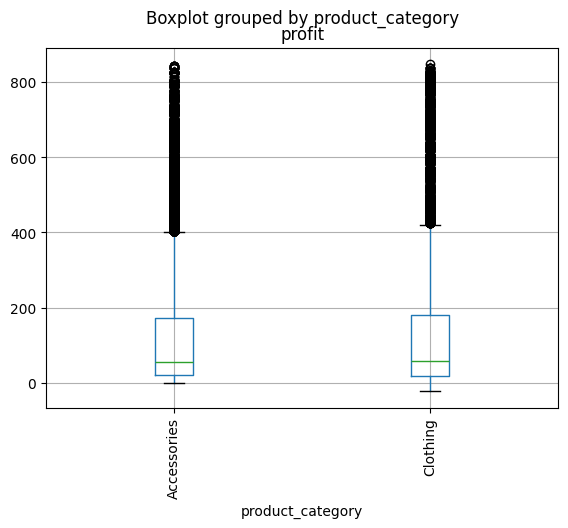

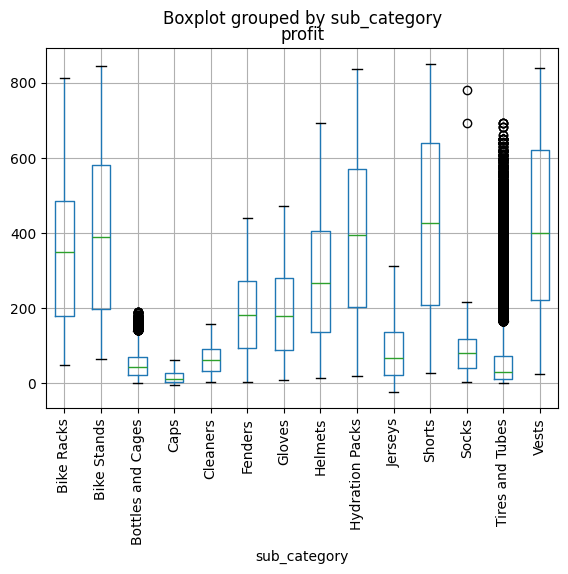

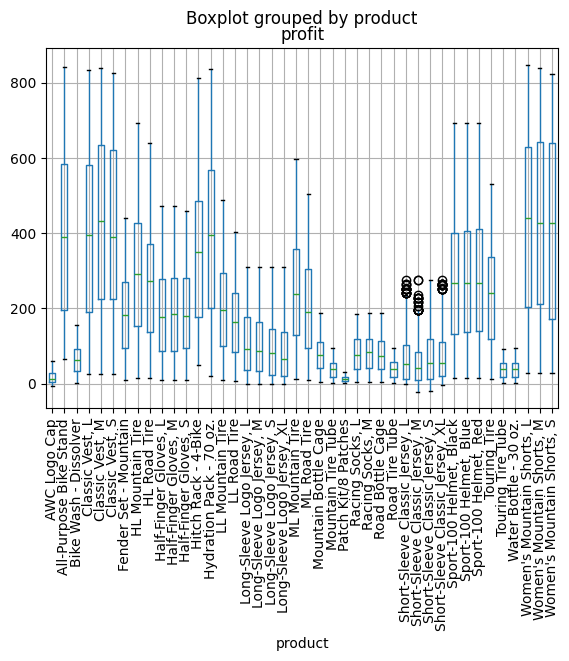

In [80]:
# отриуємо лише катеоріальні стовпчики
cat_columns = sales.select_dtypes(include='object').columns

# групові ящики, для profit
for column_name in cat_columns:
    sales.boxplot(by=column_name, column='profit')
    plt.xticks(rotation=90)